In [1]:
# GLD ML Analysis

#This notebook summarizes the model experiments and visualizations for the GLD ETF. It displays the generated figures, loads saved models (if any), and provides small code examples to run quick inference on the latest data.

#Run `viz_results.py` and `run_tuned_experiments.py` first if you haven't already to generate `figures/` and `models/.`
# Standard imports for the analysis
import os
import pandas as pd
from IPython.display import Image, display
import joblib

print('Environment ready')

Environment ready


## Figures

The script `viz_results.py` writes visualizations into the `figures/` folder. Below we show the heatmap and equity curves if they exist.

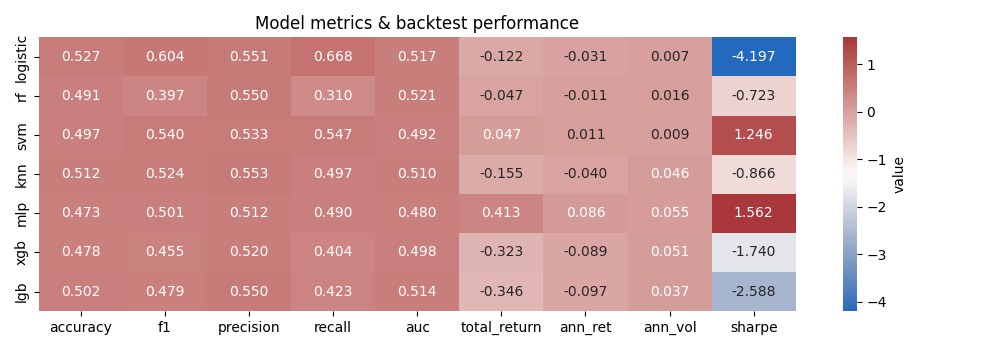

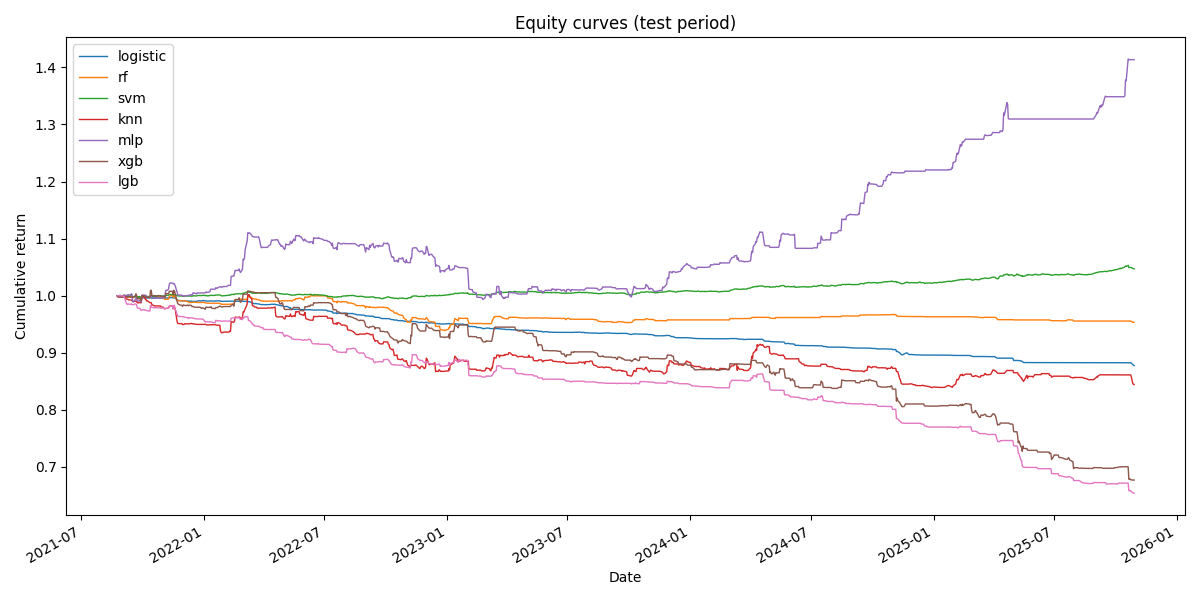

In [2]:
fig_dir = 'figures'
for fname in ['metrics_heatmap.png','equity_curves.png']:
    path = os.path.join(fig_dir, fname)
    if os.path.exists(path):
        display(Image(filename=path))
    else:
        print(f'Missing: {path}')

## Results summary (CSV / JSON)

If present, we can load the CSV summary produced by `viz_results.py` for a quick table view.

In [3]:
summary_csv = 'figures/results_summary.csv'
summary_json = 'figures/results_summary.json'
if os.path.exists(summary_csv):
    df_sum = pd.read_csv(summary_csv, index_col=0)
    display(df_sum)
elif os.path.exists(summary_json):
    import json
    with open(summary_json,'r') as f:
        j = json.load(f)
    display(pd.DataFrame(j).T)
else:
    print('No results_summary found in figures/. Run viz_results.py first.')

,accuracy,f1,precision,recall,auc,total_return,ann_ret,ann_vol,sharpe
logistic,0.527117,0.603984,0.550872,0.668430,0.517097,-0.122427,-0.030828,0.007344,-4.197462
rf,0.490961,0.396843,0.550000,0.310406,0.520674,-0.046641,-0.011387,0.015744,-0.723247
svm,0.496670,0.539600,0.532646,0.546737,0.491772,0.047097,0.011096,0.008907,1.245713
knn,0.511893,0.523677,0.552941,0.497354,0.509973,-0.155499,-0.039714,0.045867,-0.865837
mlp,0.472883,0.500901,0.511971,0.490300,0.479940,0.413400,0.086499,0.055385,1.561784
xgb,0.477640,0.454816,0.520455,0.403880,0.498404,-0.322903,-0.089259,0.051308,-1.739679
lgb,0.502379,0.478564,0.550459,0.423280,0.514262,-0.345684,-0.096702,0.037368,-2.587860


## Saved models and quick inference

If you ran `run_tuned_experiments.py`, models are saved to `models/`. This cell lists available models and shows a short example of loading one and making predictions on the most recent prepared features.

In [4]:
models_dir = 'models'
if os.path.exists(models_dir):
    models = [m for m in os.listdir(models_dir) if m.endswith('.joblib')]
    if not models:
        print('No .joblib models found in models/')
    else:
        print('models found:', models)
        # load first model and run a tiny inference example
        mdl_path = os.path.join(models_dir, models[0])
        mdl = joblib.load(mdl_path)
        print('Loaded', models[0])
        # prepare features and run prediction on the last 5 rows
        from features import prepare_features
        csv = 'GLD_daily.csv'
        if os.path.exists(csv):
            X, y, df = prepare_features(csv)
            X_recent = X.tail(5)
            preds = mdl.predict(X_recent)
            print('Recent predictions:', preds)
        else:
            print('GLD_daily.csv not found — put it in workspace root to run inference.')
else:
    print('No models/ directory found. Run run_tuned_experiments.py to produce models.')

models found: ['rf_h1.joblib', 'mlp_h5.joblib', 'lgb_h3.joblib', 'knn_h3.joblib', 'xgb_h5.joblib', 'knn_h2.joblib', 'mlp_h2.joblib', 'knn_h1.joblib', 'svm.joblib', 'xgb_h4.joblib', 'mlp_h1.joblib', 'svm_h2.joblib', 'logistic.joblib', 'xgb_h2.joblib', 'lgb_h2.joblib', 'lgb_h4.joblib', 'svm_h4.joblib', 'xgb.joblib', 'xgb_h1.joblib', 'rf_h3.joblib', 'svm_h1.joblib', 'knn_h5.joblib', 'mlp_h3.joblib', 'logistic_h4.joblib', 'lgb_h5.joblib', 'mlp_h4.joblib', 'knn_h4.joblib', 'rf_h2.joblib', 'rf_h4.joblib', 'logistic_h3.joblib', 'svm_h5.joblib', 'logistic_h5.joblib', 'logistic_h2.joblib', 'mlp.joblib', 'xgb_h3.joblib', 'rf.joblib', 'logistic_h1.joblib', 'rf_h5.joblib', 'lgb.joblib', 'lgb_h1.joblib', 'svm_h3.joblib', 'knn.joblib']
Loaded rf_h1.joblib
Recent predictions: [0 0 1 0 0]


## Interactive analysis cells

Below are helper cells to load the ensemble top contributors and calibration plot produced by `analyses.py`. Run the cell to display the top contributors table and the calibration image. You can edit these cells to add Plotly interactivity.


,Date,pnl
0,2022-11-10 00:00:00-05:00,0.030444
1,2023-03-17 00:00:00-04:00,0.028120
2,2022-03-08 00:00:00-05:00,0.027359
3,2022-11-08 00:00:00-05:00,0.023099
4,2023-03-13 00:00:00-04:00,0.021948
5,2024-08-16 00:00:00-04:00,0.021388
6,2022-09-28 00:00:00-04:00,0.020787
7,2024-04-11 00:00:00-04:00,0.019433
8,2024-07-16 00:00:00-04:00,0.018926
9,2023-01-06 00:00:00-05:00,0.018707


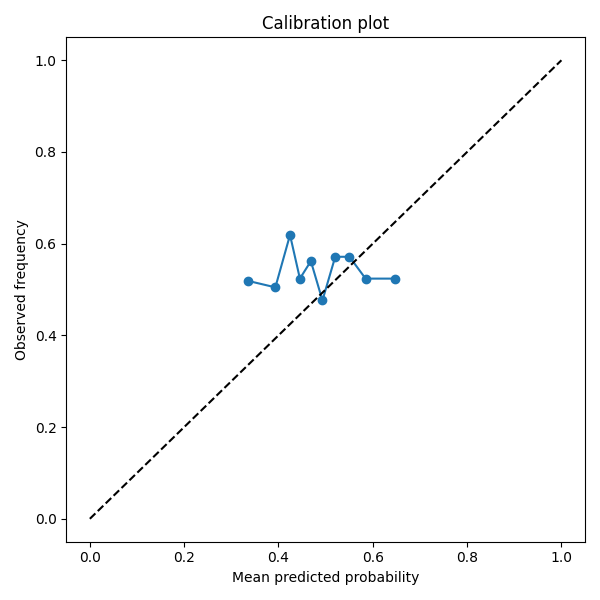

In [5]:
# Display top contributors and calibration
import os
import pandas as pd
from IPython.display import Image, display

top_fn = 'figures/analysis_ensemble_top_contributors.csv'
calib_fn = 'figures/analysis_ensemble_calib.png'

if os.path.exists(top_fn):
    display(pd.read_csv(top_fn))
else:
    print('Top contributors file missing:', top_fn)

if os.path.exists(calib_fn):
    display(Image(calib_fn))
else:
    print('Calibration image missing:', calib_fn)


# Trade-ready signals

This cell loads the `figures/trade_ready_signals.csv` produced by the analysis and provides a small interactive viewer to inspect model probabilities and top feature contributions for each model/horizon. Use the dropdown to select a row and view per-signal details (probability, validation AUC, and top feature contributions).

In [6]:
# Load and interact with trade-ready signals
import pandas as pd
from IPython.display import display

signals = pd.read_csv('figures/trade_ready_signals.csv')
if 'date' in signals.columns:
    signals['date'] = pd.to_datetime(signals['date'])

display(signals)

try:
    import ipywidgets as widgets
    from IPython.display import HTML, display as idisplay
    contribs = pd.read_json('figures/trade_ready_contribs.json', typ='series').to_dict()

    def row_label(i):
        r = signals.iloc[i]
        return f"{i}: {r['model']} h{int(r['horizon_days'])} — {r['date'].date()} (prob={r['prob']:.3f})"

    dd = widgets.Dropdown(options=[(row_label(i), i) for i in range(len(signals))], description='Select')

    output = widgets.Output()

    def on_change(change):
        if change['name'] != 'value':
            return
        idx = change['new']
        output.clear_output()
        with output:
            r = signals.iloc[idx]
            key = f"{r['model']}_h{int(r['horizon_days'])}"
            print(f"Model: {r['model']}  Horizon: {int(r['horizon_days'])}  Date: {r['date']}")
            print(f"Prob: {r['prob']:.4f}  Val AUC: {r['val_auc']:.4f}")
            print('\nTop feature contributions (stringified):')
            print(r['top_feature_contribs'])
            if key in contribs:
                print('\nFull contribution dict (top 20):')
                c = contribs[key]
                # show top 20 by absolute value
                items = sorted(c.items(), key=lambda kv: abs(kv[1]), reverse=True)[:20]
                for f,v in items:
                    print(f"{f}: {v:.6f}")

    dd.observe(on_change)
    idisplay(dd, output)
except Exception as e:
    print('Interactive widgets not available or failed to load:', e)


,as_of_date,target_date,horizon_days,model,prob,val_auc,action,copy_trade,top_feature_contribs
0,2025-10-29,2025-10-30,1,logistic,5.868332e-01,0.517097,BUY,BUY 100 @market (prob=0.587),"bb_upper:0.1364, Low:0.1172, sma_5:0.0989, sma..."
1,2025-10-29,2025-10-30,1,rf,4.600000e-01,0.520674,HOLD,HOLD (prob=0.460),"High:-0.1609, return_1d:0.1188, Close:-0.1130,..."
2,2025-10-29,2025-10-30,1,svm,5.278802e-01,0.491772,HOLD,HOLD (prob=0.528),"macd_hist:-0.1832, return_1d:0.1069, macd_sign..."
3,2025-10-29,2025-10-30,1,knn,2.000000e-01,0.509973,SELL,SELL 100 @market (prob=0.200),"macd_signal:0.1187, return_1d:0.1176, macd:0.1..."
4,2025-10-29,2025-10-30,1,mlp,1.639341e-02,0.486685,SELL,SELL 100 @market (prob=0.016),"return_2d:0.1117, atr_14:0.0986, macd_hist:-0...."
5,2025-10-29,2025-10-30,1,xgb,3.551153e-01,0.498404,SELL,SELL 100 @market (prob=0.355),"Close:-0.6620, Open:0.5945, bb_pct:-0.3407, re..."
6,2025-10-29,2025-10-30,1,lgb,5.288243e-01,0.514262,HOLD,HOLD (prob=0.529),"rsi_14:-0.3290, bb_lower:-0.2865, Volume:-0.24..."
7,2025-10-29,2025-10-31,2,logistic,4.154035e-01,0.478862,SELL,SELL 100 @market (prob=0.415),"High:-0.1229, Open:-0.1197, Low:-0.1129, bb_lo..."
8,2025-10-29,2025-10-31,2,rf,3.700000e-01,0.506899,SELL,SELL 100 @market (prob=0.370),"macd:0.1282, Close:0.1029, bb_lower:0.0951, Op..."
9,2025-10-29,2025-10-31,2,svm,5.161785e-01,0.511335,HOLD,HOLD (prob=0.516),"macd_hist:0.1195, bb_pct:0.1146, return_2d:0.0..."


Interactive widgets not available or failed to load: 'date'
